In [27]:
#Our model aims to answer the question "What will the Australian great white shark population be in 2020?"

In [28]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [29]:
"""In order to answer this question we started out our model by importing data on Australian shark populations from a csv file.
This data is a compilation of shark population data off the Australian coast from 1950 to 2009.""" 

from pandas import read_csv
filename = 'data/sharks2.csv'
tables = read_csv(filename, header=0, index_col=0)
len(tables)

60

In [30]:
tables.columns = ['year','sharks'] #naming the two columns so that python knows them when we call them

In [31]:
sharks = tables.sharks #making a table of shark populations
year = tables.year #making a table of years

Index
1     1950
2     1951
3     1952
4     1953
5     1954
6     1955
7     1956
8     1957
9     1958
10    1959
11    1960
12    1961
13    1962
14    1963
15    1964
16    1965
17    1966
18    1967
19    1968
20    1969
21    1970
22    1971
23    1972
24    1973
25    1974
26    1975
27    1976
28    1977
29    1978
30    1979
31    1980
32    1981
33    1982
34    1983
35    1984
36    1985
37    1986
38    1987
39    1988
40    1989
41    1990
42    1991
43    1992
44    1993
45    1994
46    1995
47    1996
48    1997
49    1998
50    1999
51    2000
52    2001
53    2002
54    2003
55    2004
56    2005
57    2006
58    2007
59    2008
60    2009
Name: year, dtype: int64

Saving figure to file figs/sharkpop.pdf


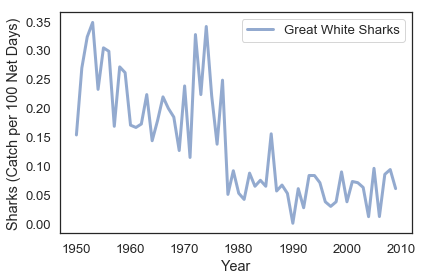

In [32]:
"""Here we are plotting the shark populations from the data by year so that we can more easily identify trends in the data."""

plot(year, sharks, '-', label='Great White Sharks') 

decorate(xlabel='Year',
         ylabel='Sharks (Catch per 100 Net Days)')
savefig('figs/sharkpop.pdf')

In [33]:
"""As you can see in the graph above, the population of Australian great white sharks at first glance seems erratic. 
In order to try and make sense of this data, we broke it up into three groups. The first being from before 1970, the second
being from 1970 to 1980, and the third being post 1980. We decided on this because from 1970 to 1980 there was a sharp decline
in the populations of Australian great white sharks. This is becuase from 1970 to 1980 the fishing technology available became
more advanced. Each ship began catching more fish, and more sharks, because more boats became diesel or gasoline. Another reason
for this sharp decline is because the number of fishing boats in the world between 1970 and 1995 almost doubled.

Based off of this concept of splitting the graph into three sections, we modeled a best fit line for the graph that we could 
use to extend past the data and predict Australian great white shark populations in the future."""

'As you can see in the graph above, the population of Australian great white sharks at first glance seems erratic. \nIn order to try and make sense of this data, we broke it up into three groups. The first being from before 1970, the second\nbeing from 1970 to 1980, and the third being post 1980. We decided on this because from 1970 to 1980 there was a sharp decline\nin the populations of Australian great white sharks. This is becuase from 1970 to 1980 the fishing technology available became\nmore advanced. Each ship began catching more fish, and more sharks, because more boats became diesel or gasoline. Another reason\nfor this sharp decline is because the number of fishing boats in the world between 1970 and 1995 almost doubled.\n\nBased off of this concept of splitting the graph into three sections, we modeled a best fit line for the graph that we could \nuse to extend past the data and predict Australian great white shark populations in the future.'

In [34]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[t_0] = .25
    
    for t in linrange(1950, 2020):
        results[t+1] = update_func1(t, results)
        
    return results

In [35]:
def plot_results(results, title):
    """plots the results from our model
    
    plots the results from the calculations that make our best fit line"""
    plot(year, sharks, '-', label='sharks')
    plot(results, ':', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Sharks per 100 Net Days',
             title='Sharks per 100 Net Days vs. Year')

In [36]:
def update_func1(year, results):
    if  1970 < year < 1980:
        net_growth = -.0125
    elif year > 1980:
        net_growth = -.00066786
    else: 
        net_growth = -.00275
    return results[year] + net_growth

In [37]:
results = run_simulation(system, update_func1)
plot_results(results, 'title')

NameError: name 'system' is not defined

In [38]:
results[2020] #reporting the number of sharks our best fit line predicts in 2020

NameError: name 'results' is not defined

In [39]:
"""We find that in 2020 the population of Australian great white sharks in Sharks per 100 net days is about .051. We can also
see on our plot that unless there is another shift in trends of the population of Australian great white sharks, the population
will continue to decrease. This is important because without great white sharks, an apex predator, in our oceans the entire 
ecosystem could be thrown off."""

'We find that in 2020 the population of Australian great white sharks in Sharks per 100 net days is about .051. We can also\nsee on our plot that unless there is another shift in trends of the population of Australian great white sharks, the population\nwill continue to decrease. This is important because without great white sharks, an apex predator, in our oceans the entire \necosystem could be thrown off.'